## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from matplotlib.ticker import MultipleLocator

## Data processing

### Load Data

In [2]:
anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')
print('anime Shape', anime_df.shape)
print('rating Shape', rating_df.shape)

anime Shape (12294, 7)
rating Shape (7813737, 3)


In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Anime.csv

- **anime_id**: myanimelist.net's unique id identifying an anime.
- **name**: full name of anime.
- **genre**: comma separated list of genres for this anime.
- **type**: movie, TV, OVA, etc.
- **episodes**: how many episodes in this show. (1 if movie).
- **rating**: average rating out of 10 for this anime.
- **members**: number of community members that are in this anime's "group".

In [4]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Rating.csv

- **user_id**: non identifiable randomly generated user id.
- **anime_id**: the anime that this user has rated.
- **rating**: rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).


In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


### anime_df Missing Values

In [9]:
print('anime_df MISSING VALUES:')
print(anime_df.isnull().sum())

anime_df MISSING VALUES:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


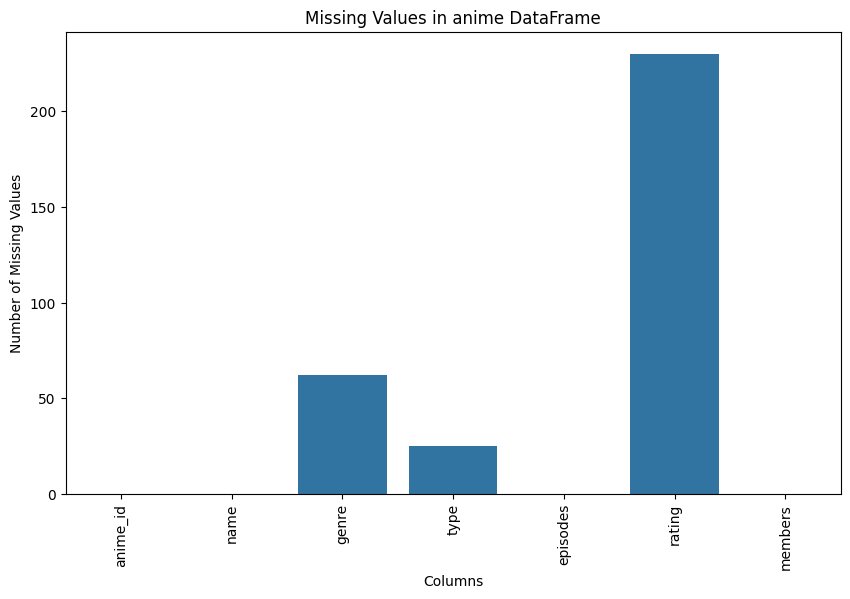

In [10]:
anime_missing_values = anime_df.isnull().sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=anime_missing_values.index, y=anime_missing_values.values)
plt.title('Missing Values in anime DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

### Missing anime_df values processing

#### Row has null value

In [11]:
anime_df[anime_df.isnull().any(axis=1)]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


#### This null values can filling so i will blalalala them

##### 1. null genre processing

In [12]:
def fill_genre(name):
    url = f'https://api.jikan.moe/v4/anime?q={name}&limit=1'
    for _ in range(5):
        res = requests.get(url)
        if res.status_code == 200:
            data = res.json()
            if data['data']:
                genres = data['data'][0].get('genres', [])
                return ', '.join(genre['name'] for genre in genres)
    return -1

In [13]:
for index, row in anime_df.iterrows():
    if pd.isna(row['genre']):
        genre = fill_genre(row['name'].strip())
        anime_df.at[index, 'genre'] = genre


###### Check again

In [14]:
print('anime_df MISSING VALUES:')
print(anime_df.isnull().sum())

anime_df MISSING VALUES:
anime_id      0
name          0
genre         0
type         25
episodes      0
rating      230
members       0
dtype: int64


In [15]:
count_negative_ones = (anime_df == -1).sum()

print(count_negative_ones)

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


##### 2. null type processing

In [16]:
def fill_type(name):
    url = f'https://api.jikan.moe/v4/anime?q={name}&limit=1'
    for _ in range(5):
        res = requests.get(url)
        if res.status_code == 200:
            data = res.json()
            if data['data']:
                type = data['data'][0].get('type')
                return type
    return -1

In [17]:
for index, row in anime_df.iterrows():
    if pd.isna(row['type']):
        type = fill_type(row['name'].strip())
        anime_df.at[index,'type'] = type

In [18]:
print('anime_df MISSING VALUES:')
print(anime_df.isnull().sum())

anime_df MISSING VALUES:
anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64


In [19]:
count_negative_ones = (anime_df == -1).sum()

print(count_negative_ones)

anime_id    0
name        0
genre       0
type        1
episodes    0
rating      0
members     0
dtype: int64


##### 3. null rating processing

In [20]:
def fill_rating(name):
    url = f'https://api.jikan.moe/v4/anime?q={name}&limit=1'
    for _ in range(5):
        res = requests.get(url)
        if res.status_code == 200:
            data = res.json()
            if data['data']:
                rating = data['data'][0].get('score')
                return rating
    return -1

In [21]:
for index, row in anime_df.iterrows():
    if pd.isna(row['rating']):
        rating = fill_rating(row['name'].strip())
        anime_df.at[index,'rating'] = rating

In [22]:
print('anime_df MISSING VALUES:')
print(anime_df.isnull().sum())

anime_df MISSING VALUES:
anime_id     0
name         0
genre        0
type         0
episodes     0
rating      13
members      0
dtype: int64


In [23]:
count_negative_ones = (anime_df == -1).sum()

print(count_negative_ones)

anime_id    0
name        0
genre       0
type        1
episodes    0
rating      1
members     0
dtype: int64


after that, i wil see which rows have genre == -1 or rating == -1 or type == -1 because fill function can fill these rows so it will be -1

In [24]:
anime_df = anime_df.query('genre != -1 and rating != -1 and type != -1')
count_negative_ones = (anime_df == -1).sum()

print(count_negative_ones)

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


### Missing rating_df values processing

In [25]:
print(rating_df.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


In [26]:
 rating_df['rating'].unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

In [27]:
rating_df = rating_df[rating_df['rating'] != -1]



In [28]:
 rating_df['rating'].unique()


array([10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

### Duplicates

In [29]:
print(f'Duplicates in anime set: {anime_df.duplicated().sum()}')
print('')
print(f'Duplicates in rating set: {rating_df.duplicated().sum()}')

# Hiển thị các bản ghi trùng lặp
print('Duplicate records in anime set:')
print(anime_df[anime_df.duplicated()])

print('Duplicate records in rating set:')
print(rating_df[rating_df.duplicated()])

Duplicates in anime set: 0

Duplicates in rating set: 1
Duplicate records in anime set:
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members]
Index: []
Duplicate records in rating set:
         user_id  anime_id  rating
4499316    42653     16498       8


In [30]:
anime_df.drop_duplicates(inplace=True)
rating_df.drop_duplicates(inplace=True)

# Kiểm tra lại sau khi xóa trùng lặp
print(f'After removing duplicates, records in anime set: {anime_df.duplicated().sum()}')
print('')
print(f'After removing duplicates, records in rating set: {rating_df.duplicated().sum()}')

After removing duplicates, records in anime set: 0

After removing duplicates, records in rating set: 0


In [31]:
rating_df['rating'] = rating_df['rating'].replace(-1, np.nan)

## Analyst

### top 10 anime có nhiều member 

In [32]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [33]:
top_animegroup = anime_df.copy()
top_animegroup = top_animegroup.sort_values(['members'],ascending=False)

In [34]:
top_animegroup

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
...,...,...,...,...,...,...,...
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10424,33320,Suijun Genten,Award Winning,Movie,1,7.00,13
10444,34490,Sushi Azarashi,Comedy,TV,30,3.00,12
10990,34485,Ganko-chan,"Comedy, Sci-Fi",TV,Unknown,NaN,11


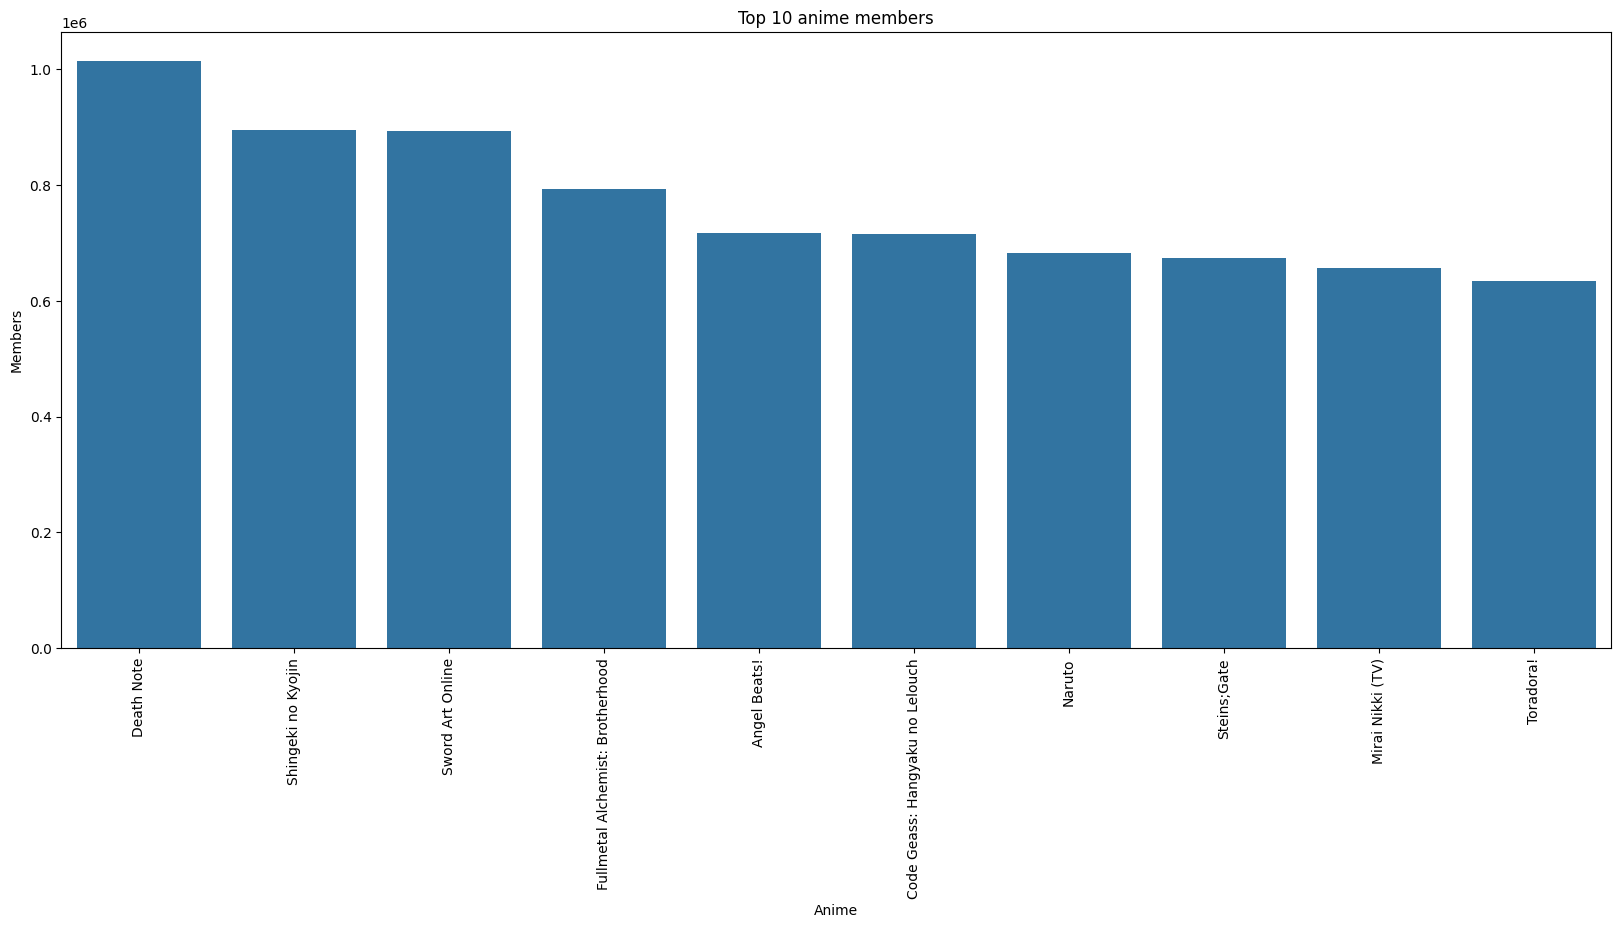

In [35]:
plt.subplots(figsize=(20,8))
sns.barplot(x=top_animegroup['name'][:10], y =top_animegroup['members'][:10] )
plt.title('Top 10 anime members')
plt.xlabel('Anime')
plt.ylabel('Members')
plt.xticks(rotation=90)
plt.show()

In [36]:
type_counts = anime_df['type'].value_counts()
print(type_counts)

type
TV         3804
OVA        3313
Movie      2351
Special    1676
ONA         659
Music       490
Name: count, dtype: int64



# phân tích genre 1 xíu
## 1 bộ phim thì có nhiều genre ví dụ 
 ## Kimi no Na wa  có genre: Drama, Romance, School, Supernatural

In [37]:
from collections import Counter
anime_genre = anime_df.copy()

# Loại bỏ khoảng trắng trước và sau dấu phẩy trong cột genre
anime_genre['genre'] = anime_genre['genre'].str.replace(', ', ',')

# Tách cột genre thành danh sách các thể loại
anime_genre['genre'] = anime_genre['genre'].str.split(',')
# Tách cột genre thành danh sách các thể loại

# Tạo một danh sách chứa tất cả các thể loại
all_genres = [genre for sublist in anime_genre['genre'] for genre in sublist if genre]
# Tạo một danh sách chứa tất cả các thể loại

genre_counts = Counter(all_genres)
print(genre_counts)


Counter({'Comedy': 4651, 'Action': 2848, 'Adventure': 2349, 'Fantasy': 2312, 'Sci-Fi': 2073, 'Drama': 2017, 'Shounen': 1712, 'Kids': 1609, 'Romance': 1466, 'Slice of Life': 1226, 'School': 1220, 'Hentai': 1141, 'Supernatural': 1038, 'Mecha': 944, 'Music': 860, 'Historical': 806, 'Magic': 778, 'Ecchi': 637, 'Shoujo': 603, 'Seinen': 547, 'Sports': 543, 'Mystery': 495, 'Super Power': 465, 'Military': 426, 'Parody': 408, 'Space': 381, 'Horror': 369, 'Harem': 317, 'Demons': 294, 'Martial Arts': 265, 'Dementia': 240, 'Psychological': 229, 'Police': 197, 'Game': 181, 'Samurai': 148, 'Vampire': 102, 'Thriller': 87, 'Cars': 72, 'Shounen Ai': 65, 'Shoujo Ai': 55, 'Josei': 54, 'Yuri': 42, 'Yaoi': 39, 'Avant Garde': 15, 'Award Winning': 1, 'Suspense': 1, 'Gourmet': 1})


In [38]:
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_df.columns = ['Genre', 'Count']

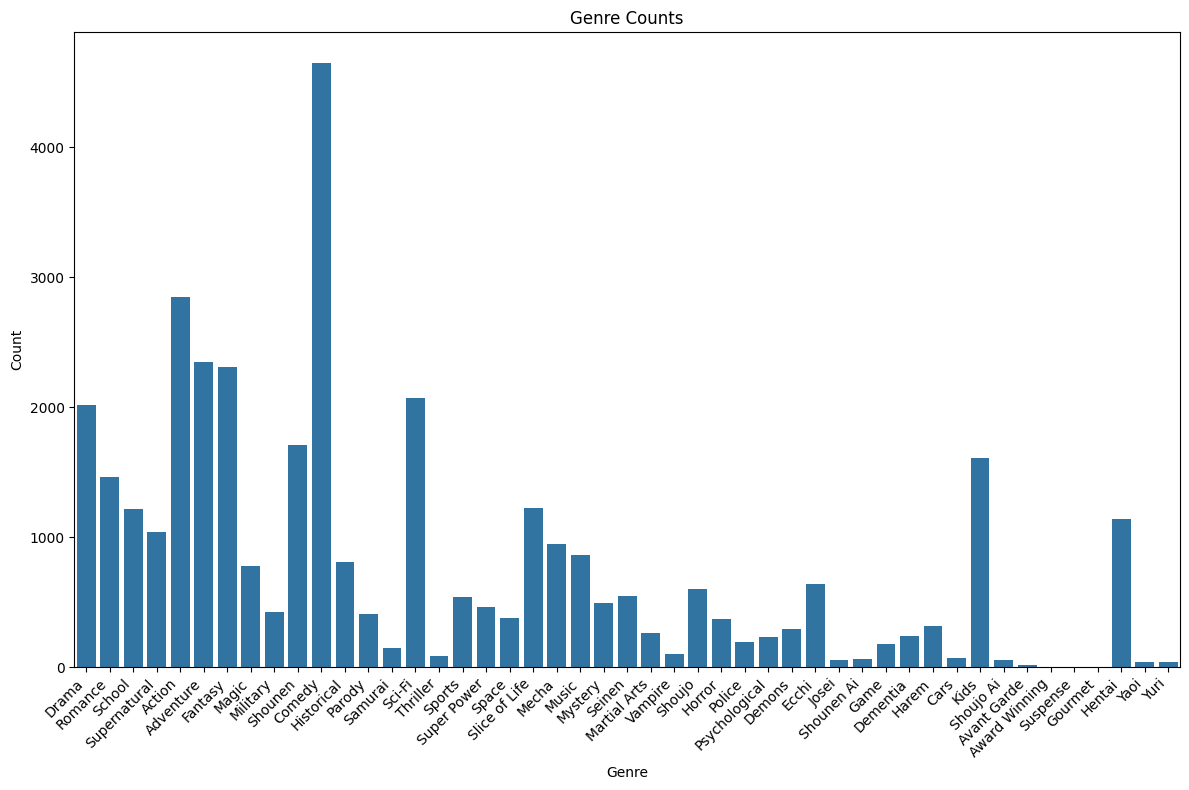

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='Count', data=genre_df)
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x cho dễ đọc
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### này là genre và trung bình rating

In [40]:
exploded_genres = anime_genre.explode('genre')

# Tính trung bình rating cho mỗi thể loại
genre_ratings = exploded_genres.groupby('genre')['rating'].mean().reset_index()
genre_ratings.columns = ['Genre', 'Average Rating']

genre_ratings = genre_ratings.sort_values(['Average Rating'],ascending=False)
genre_ratings

,Genre,Average Rating
18,Josei,7.462222
44,Thriller,7.395517
25,Mystery,7.229677
43,Suspense,7.190000
27,Police,7.127614
36,Shounen,7.059544
23,Military,7.015765
28,Psychological,7.004760
42,Supernatural,7.003896
4,Award Winning,7.000000


### genre và tổng members mỗi genre

In [41]:

genre_members = exploded_genres.groupby('genre')['members'].sum().reset_index()
genre_members.columns = ['Genre', 'Total members']
genre_members = genre_members.sort_values(['Total members'], ascending = False)
print(genre_members)

            Genre  Total members
6          Comedy      107010321
1          Action       95532448
29        Romance       65670491
9           Drama       58274509
11        Fantasy       57261117
42   Supernatural       57008080
31         School       55005585
36        Shounen       54115368
2       Adventure       45527237
32         Sci-Fi       44922211
38  Slice of Life       31991145
25        Mystery       26877898
10          Ecchi       25013853
33         Seinen       23177487
41    Super Power       22805793
20          Magic       21155439
14          Harem       19897828
28  Psychological       17211633
22          Mecha       14983181
34         Shoujo       13451446
17         Horror       12578528
23       Military       12226177
16     Historical       11413035
44       Thriller       10133530
8          Demons        9527602
26         Parody        7965429
40         Sports        7401243
21   Martial Arts        7105769
12           Game        6751779
45        

In [42]:
"""plt.figure(figsize=(14, 7))
sns.barplot(x='Genre', y='Total members', data=genre_members)
plt.xticks(rotation=90)
plt.title('Total Members by Genre')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Genre', y='Average Rating', data=genre_ratings)
plt.xticks(rotation=90)
plt.title('Average Rating by Genre')
plt.show()"""

"plt.figure(figsize=(14, 7))\nsns.barplot(x='Genre', y='Total members', data=genre_members)\nplt.xticks(rotation=90)\nplt.title('Total Members by Genre')\nplt.show()\n\nplt.figure(figsize=(14, 7))\nsns.barplot(x='Genre', y='Average Rating', data=genre_ratings)\nplt.xticks(rotation=90)\nplt.title('Average Rating by Genre')\nplt.show()"

In [43]:
merged_data = pd.merge(genre_members, genre_ratings, on='Genre')

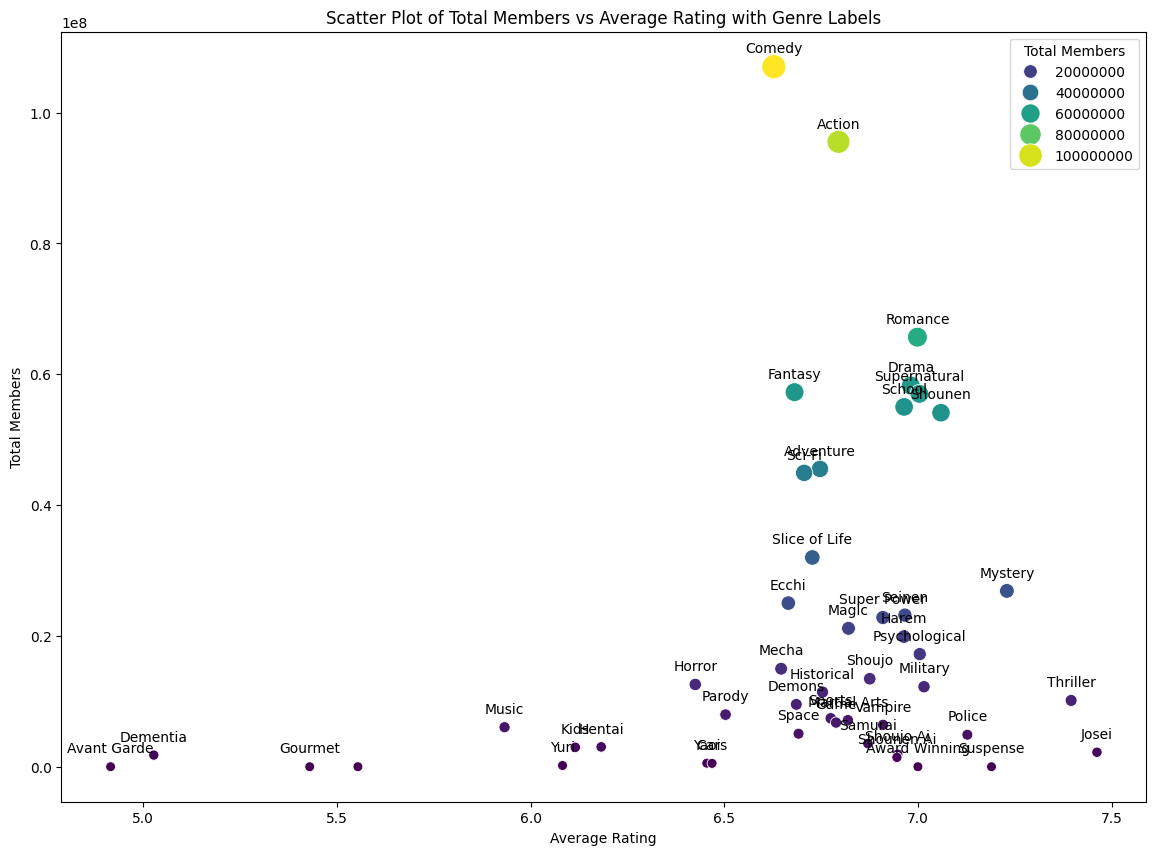

In [44]:
# Kết hợp hai DataFrame theo cột 'Genre'
plt.figure(figsize=(14, 10))

# Tô màu dựa trên số lượng thành viên
sns.scatterplot(
    x='Average Rating', 
    y='Total members', 
    data=merged_data,
    hue='Total members',  # Thay đổi màu sắc dựa trên số lượng thành viên
    palette='viridis',     # Chọn bảng màu
    size='Total members',  # Thay đổi kích thước dựa trên số lượng thành viên
    sizes=(50, 300)        # Thay đổi kích thước tối thiểu và tối đa
)

# Thêm tên của từng thể loại vào biểu đồ
for i in range(merged_data.shape[0]):
    plt.annotate(
        merged_data['Genre'].iloc[i], 
        (merged_data['Average Rating'].iloc[i], merged_data['Total members'].iloc[i]), 
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

plt.title('Scatter Plot of Total Members vs Average Rating with Genre Labels')
plt.ylabel('Total Members')
plt.xlabel('Average Rating')
plt.legend(title='Total Members')
plt.show()

### từ trên ta có thể nhận thấy những thể loại có nhiều member và đạt rating cao

# Phân tích type 1 xíu

In [45]:
typeanime_df = anime_df.copy()


### tổng phim từng type

In [46]:
anime_each_type = typeanime_df.groupby('type')['anime_id'].count().reset_index()
anime_each_type.columns = ['type', 'count']
anime_each_type

,type,count
0,Movie,2351
1,Music,490
2,ONA,659
3,OVA,3313
4,Special,1676
5,TV,3804


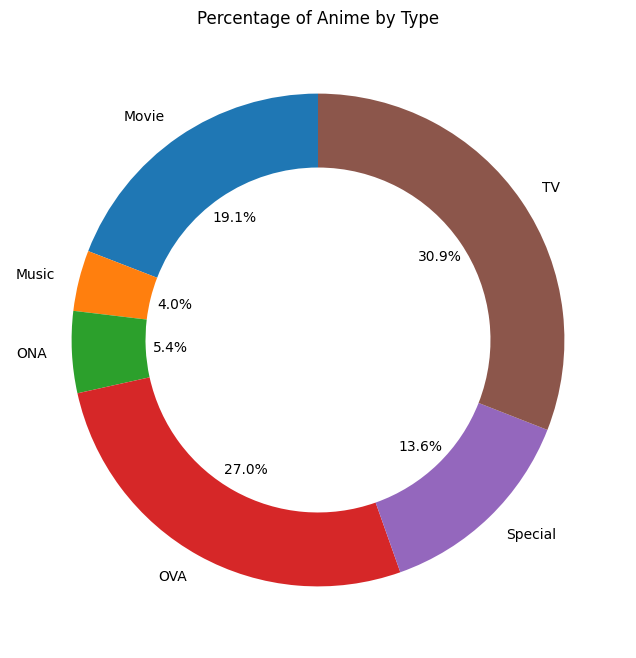

In [47]:
# Tính tổng số anime
total_anime = anime_each_type['count'].sum()

# Tính phần trăm cho từng loại anime
anime_each_type['percentage'] = (anime_each_type['count'] / total_anime) * 100

# Vẽ biểu đồ donut
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(anime_each_type['count'], labels=anime_each_type['type'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Đặt tiêu đề
plt.title('Percentage of Anime by Type')
plt.show()

In [48]:
# Tính trung bình rating cho từng loại anime
rating_each_type = typeanime_df.groupby('type')['rating'].mean().reset_index()
rating_each_type.columns = ['type', 'Average Rating']

# Tính tổng số thành viên cho từng loại anime
members_sum = typeanime_df.groupby('type')['members'].sum().reset_index()
members_sum.columns = ['type', 'Members Sum']

# Kết hợp hai DataFrame
rating_each_type = pd.merge(rating_each_type, members_sum, on='type')

rating_each_type

,type,Average Rating,Members Sum
0,Movie,6.334331,24375005
1,Music,5.589714,643264
2,ONA,5.645319,2711146
3,OVA,6.377841,19824143
4,Special,6.523467,12865078
5,TV,6.897525,161749949


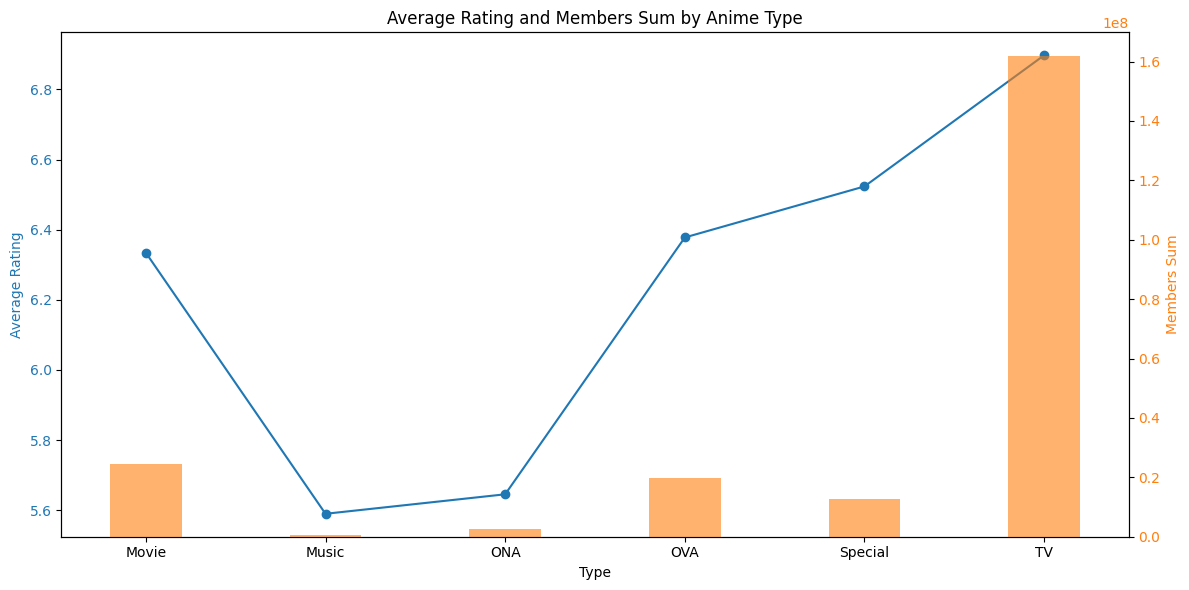

In [49]:
# Dữ liệu
types = rating_each_type['type']
average_ratings = rating_each_type['Average Rating']
members_sum = rating_each_type['Members Sum']

# Thiết lập kích thước biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Đặt độ rộng cột
bar_width = 0.4  # Điều chỉnh giá trị này để thay đổi độ rộng cột
index = range(len(types))

# Vẽ biểu đồ đường cho Average Rating
color = 'tab:blue'
ax1.set_xlabel('Type')
ax1.set_ylabel('Average Rating', color=color)
ax1.plot(index, average_ratings, color=color, marker='o', label='Average Rating')
ax1.tick_params(axis='y', labelcolor=color)

# Thiết lập trục x cho biểu đồ cột
ax1.set_xticks(index)
ax1.set_xticklabels(types)

# Tạo một trục y thứ hai để vẽ Members Sum
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Members Sum', color=color)
bars = ax2.bar(index, members_sum, color=color, width=bar_width, alpha=0.6, label='Members Sum')
ax2.tick_params(axis='y', labelcolor=color)

# Thêm tiêu đề
plt.title('Average Rating and Members Sum by Anime Type')

# Hiển thị biểu đồ
fig.tight_layout()
plt.show()


### /Anime nổi bật từng type

## top anime có rating cao nhất mỗi type,(xet thêm members)

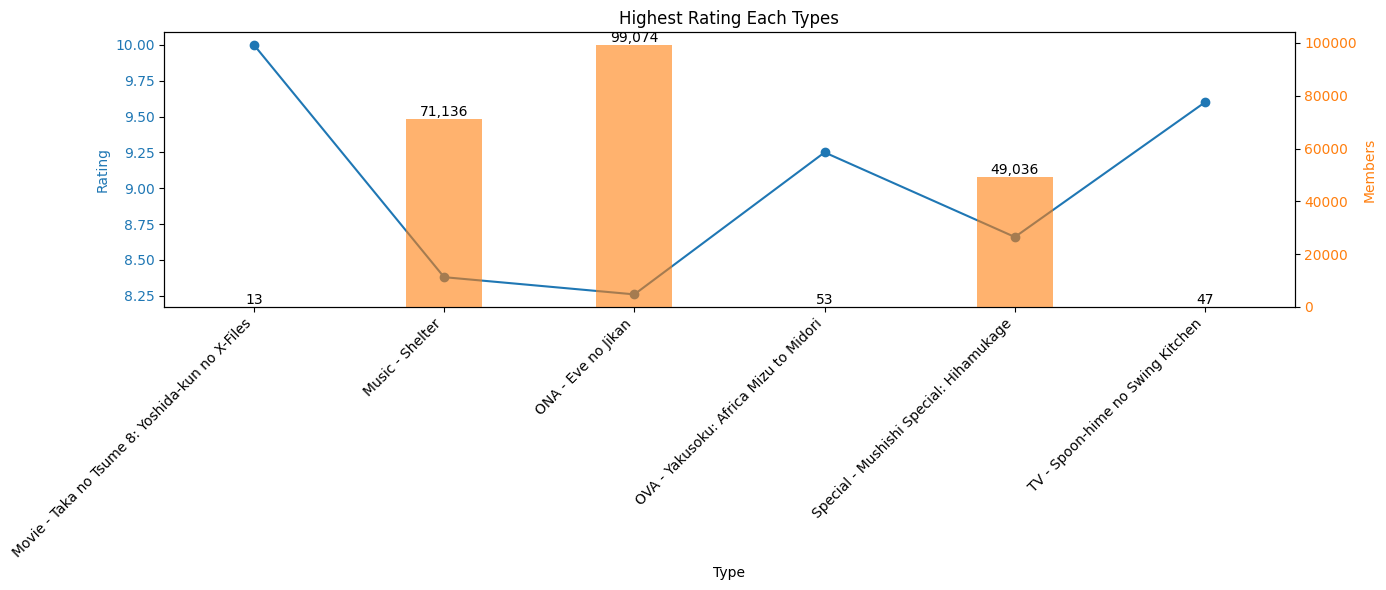

In [50]:
# Lấy bộ anime có rating cao nhất cho từng type
top_anime_by_rating = typeanime_df.loc[typeanime_df.groupby('type')['rating'].idxmax()]

# Thiết lập kích thước biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 6))

# Đặt độ rộng cột
bar_width = 0.4
index = range(len(top_anime_by_rating))

# Vẽ biểu đồ đường cho rating
color = 'tab:blue'
ax1.set_xlabel('Type')
ax1.set_ylabel('Rating', color=color)
ax1.plot(index, top_anime_by_rating['rating'], color=color, marker='o', label='Rating')
ax1.tick_params(axis='y', labelcolor=color)

# Thiết lập trục x cho biểu đồ
ax1.set_xticks(index)
ax1.set_xticklabels(top_anime_by_rating['type'] + " - " + top_anime_by_rating['name'], rotation=45, ha='right')

# Tạo một trục y thứ hai để vẽ members
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Members', color=color)
bars = ax2.bar(index, top_anime_by_rating['members'], color=color, width=bar_width, alpha=0.6, label='Members')
ax2.tick_params(axis='y', labelcolor=color)

# Thêm nhãn số lượng members trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center', fontsize=10, color='black')

# Thêm tiêu đề
plt.title('Highest Rating Each Types')

# Hiển thị biểu đồ
fig.tight_layout()
plt.show()

## top anime có members nhiều nhất mỗi type,(xet thêm rating)

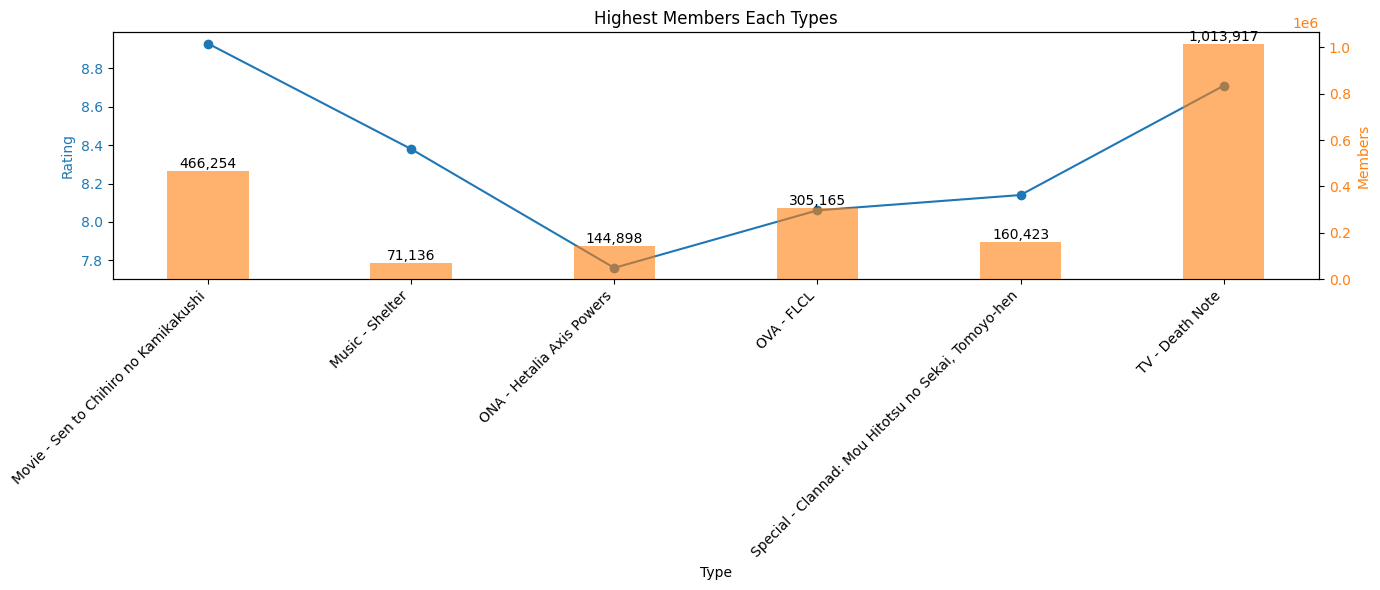

In [51]:
# Lấy bộ anime có rating cao nhất cho từng type
top_anime_by_member = typeanime_df.loc[typeanime_df.groupby('type')['members'].idxmax()]

# Thiết lập kích thước biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 6))

# Đặt độ rộng cột
bar_width = 0.4
index = range(len(top_anime_by_member))

# Vẽ biểu đồ đường cho rating
color = 'tab:blue'
ax1.set_xlabel('Type')
ax1.set_ylabel('Rating', color=color)
ax1.plot(index, top_anime_by_member['rating'], color=color, marker='o', label='Rating')
ax1.tick_params(axis='y', labelcolor=color)

# Thiết lập trục x cho biểu đồ
ax1.set_xticks(index)
ax1.set_xticklabels(top_anime_by_member['type'] + " - " + top_anime_by_member['name'], rotation=45, ha='right')

# Tạo một trục y thứ hai để vẽ members
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Members', color=color)
bars = ax2.bar(index, top_anime_by_member['members'], color=color, width=bar_width, alpha=0.6, label='Members')
ax2.tick_params(axis='y', labelcolor=color)

# Thêm nhãn số lượng members trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center', fontsize=10, color='black')

# Thêm tiêu đề
plt.title('Highest Members Each Types')

# Hiển thị biểu đồ
fig.tight_layout()
plt.show()

### RECOMMENDATION (Content Based Recommender)

In [52]:
usedata = anime_df.copy()

In [53]:
usedata

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [54]:
usedata.isnull().sum()

anime_id     0
name         0
genre        0
type         0
episodes     0
rating      13
members      0
dtype: int64

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")
usedata.drop_duplicates(subset ="name", keep = "first", inplace = True)
usedata.reset_index(drop = True, inplace = True)
usedata['combined'] = usedata['genre'] + ", " + usedata['type']
genres = usedata["combined"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [58]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)   

rec_indices = pd.Series(usedata.index, index = usedata["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : usedata["name"].iloc[anime_indices].values,
               "Rating" : usedata["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe

In [59]:
give_recommendation("Bleach")

Recommendations for Bleach viewers :



,Anime Name,Rating
No,,
1,Bleach Movie 4: Jigoku-hen,7.75
2,Bleach Movie 3: Fade to Black - Kimi no Na wo ...,7.66
3,Katekyo Hitman Reborn!,8.37
4,Toriko: Jump Super Anime Tour 2009 Special,7.13
5,Toriko: Barbarian Ivy wo Hokaku Seyo!,6.85
6,Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...,6.83
7,Code:Breaker,7.03
8,Katekyo Hitman Reborn! x ēlDLIVE Special,7.10
9,Tokyo ESP,6.64
